In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

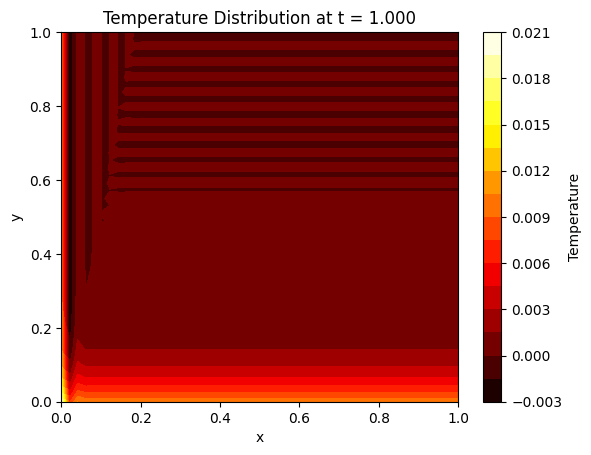

In [6]:

# Parameters
alpha = 0.01    # Thermal diffusivity
Lx, Ly = 1.0, 1.0  # Dimensions of the 2D domain
nx, ny = 50, 50    # Number of spatial grid points
dx, dy = Lx / (nx - 1), Ly / (ny - 1)  # Spatial step sizes
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)

# Create a meshgrid for 2D domain
X, Y = np.meshgrid(x, y)

# Initial condition: Gaussian distribution at the center
u_initial = np.zeros((len(X), len(Y))).flatten()

# Function to compute the right-hand side of the ODE system
def heat_equation_2d(t, u):
    u = u.reshape((nx, ny))  # Reshape to 2D
    dudx2 = np.zeros_like(u)
    dudy = np.zeros_like(u)
    dudy[:, 0] = 1
    dudx2[0,:] = 1

    # Compute second derivatives using finite differences
    dudx2[1:-1, :] = (u[2:, :] - 2 * u[1:-1, :] + u[:-2, :]) / dx**2
    dudy[:, 1:] = (u[:, 1:] - u[:, :-1]) / dy

    # Return the result as a flattened array
    return (alpha * (dudx2 + dudy)).flatten()

# Time points for the solution
t_span = (0, 1)  # Time interval
t_eval = np.linspace(0, 1, 10000)  # Time evaluation points

# Solve the system of ODEs using solve_ivp
sol = solve_ivp(heat_equation_2d, t_span, u_initial, method='RK45', t_eval=t_eval)

plt.figure()
u_plot = sol.y[:, -1].reshape((nx, ny))
plt.contourf(X, Y, u_plot, 20, cmap='hot')
plt.colorbar(label='Temperature')
plt.title(f'Temperature Distribution at t = {sol.t[-1]:.3f}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
#THIS IS THE ONE THAT IS THE WRONG WAY AROUND!!!! testing 2D form for one component
num_z, num_x = 10, 3
Lz, Lx = 1.0, 1.0  # Dimensions of the 2D domain CAN ADD THE LENGTH AND RADIUS LATER
nz, nx = num_z, num_x+2   # Number of spatial grid points with 2 imaginary nodes
dz, dx = Lz / (nz - 1), Lx / (nx - 1)  # Spatial step sizes
z = np.linspace(0, Lz, nz)
x = np.linspace(0, Lx, nx)

D = 10**-2 #diffusion coeff
v0 = 0.2 #velocity

#initial condition
u_init = np.zeros((len(z), len(x)))
u_init[0,:] = 0.6

u_init = u_init.flatten()


#in the x direction we have to add two imaginary nodes for the derivatives calculation
#WOULD NOW HAVE Y BE 2 SPACES LARGER TO COMPENSATE, but we can also just set the dydx2 at that point = 0

def pde(t,y):
    y = y.reshape((nz, nx)) #y at the boudary should already be set to whatever it is
    dydx2 = np.zeros_like(y) #z ,x
    dydz = np.zeros_like(y)

    y[:,0] = y[:,1] #makes it so that there is no flux on bottom boundary (imaginary point in y)
    y[:,-1] = 0 #change the flux at this boundary to be the reaction later

    #dont want to touch y(0,:), we want dydz and dydx2 to be 0 at that point
    dydz[1:,1:-1] = (y[1:,1:-1] - y[:-1,1:-1])/dz
    dydx2[:,1:-1] = (y[:, 2:] - 2 * y[:, 1:-1] + y[:, :-2]) / dx**2

    dydt = D*dydx2 - v0*dydz

    return dydt.flatten()

t_final = 1
t_span = (0, t_final)  # Time interval
t_eval = np.linspace(0, t_final, 5)  # Time evaluation points

# sol = solve_ivp(pde, t_span, u_init, method='RK45', t_eval=t_eval)

x_plot = np.linspace(0, 1, num_x)

# plt.figure()
# u_plot = sol.y[:, -1].reshape((nz, nx))
# plt.contourf(z, x_plot, u_plot[:,1:-1].T, 20, cmap='hot')
# plt.colorbar(label='Temperature')
# plt.title(f'Temperature Distribution at t = {sol.t[-1]:.3f}')
# plt.xlabel('z')
# plt.ylabel('x')
# plt.show()

[[0.6 0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.6 0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.6 0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.6 0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.6 0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.6 0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.6 0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.6 0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.6 0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.6 0.  0.  0.  0.  0.  0.  0.  0.  0. ]]
[0.6 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.6 0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.6 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.6 0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.6 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.6 0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.6 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.6 0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.6 0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.6 0.  0.  0.  0.  0.  0.  0.  0.  0. ]
[[ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     1.08   0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     1.08   0.  

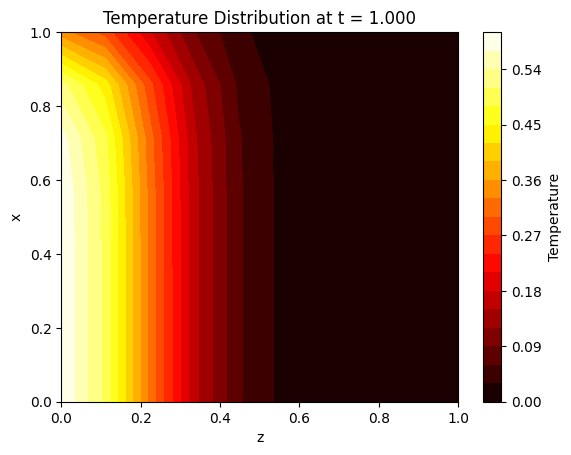

In [95]:
#FIXING TRANSPOSE ISSUE
#testing 2D form for one component
num_z, num_x = 10, 8
Lz, Lx = 1.0, 1.0  # Dimensions of the 2D domain CAN ADD THE LENGTH AND RADIUS LATER
nz, nx = num_z, num_x+2   # Number of spatial grid points with 2 imaginary nodes
dz, dx = Lz / (nz - 1), Lx / (nx - 1)  # Spatial step sizes
z = np.linspace(0, Lz, nz)
x = np.linspace(0, Lx, nx)

D = 10**-2 #diffusion coeff
v0 = 0.2 #velocity

#initial condition
u_init = np.zeros((len(x), len(z)))
u_init[:,0] = 0.6

print(u_init)

u_init = u_init.flatten()

print(u_init)
#in the x direction we have to add two imaginary nodes for the derivatives calculation
#WOULD NOW HAVE Y BE 2 SPACES LARGER TO COMPENSATE, but we can also just set the dydx2 at that point = 0

def pde(t,y):
    y = y.reshape((nx, nz)) #y at the boudary should already be set to whatever it is
    dydx2 = np.zeros_like(y) #z ,x
    dydz = np.zeros_like(y)

    y[0,:] = y[1,:] #makes it so that there is no flux on bottom boundary (imaginary point in y)
    y[-1,:] = 0 #change the flux at this boundary to be the reaction later

    #dont want to touch y(0,:), we want dydz and dydx2 to be 0 at that point
    dydz[1:-1,1:] = (y[1:-1,1:] - y[1:-1,:-1])/dz
    dydx2[1:-1,:] = (y[2:, :] - 2 * y[1:-1, :] + y[:-2, :]) / dx**2

    dydt = D*dydx2 - v0*dydz
    print(dydt)

    return dydt.flatten()

t_final = 1
t_span = (0, t_final)  # Time interval
t_eval = np.linspace(0, t_final, 5)  # Time evaluation points

sol = solve_ivp(pde, t_span, u_init, method='RK45', t_eval=t_eval)

x_plot = np.linspace(0, 1, num_x)

plt.figure()
u_plot = sol.y[:, -1].reshape((nx, nz))
plt.contourf(z, x_plot, u_plot[1:-1,:], 20, cmap='hot')
plt.colorbar(label='Temperature')
plt.title(f'Temperature Distribution at t = {sol.t[-1]:.3f}')
plt.xlabel('z')
plt.ylabel('x')
plt.show()

[[[ 0.     0.     0.     0.     0.   ]
  [ 0.     0.48   0.     0.     0.   ]
  [ 0.     0.48   0.     0.     0.   ]
  [-0.096  0.48   0.     0.     0.   ]
  [ 0.     0.     0.     0.     0.   ]]

 [[ 0.     0.     0.     0.     0.   ]
  [ 0.     0.8    0.     0.     0.   ]
  [ 0.     0.8    0.     0.     0.   ]
  [-1.6    0.8    0.     0.     0.   ]
  [ 0.     0.     0.     0.     0.   ]]]
[[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
    0.00000000e+00]
  [ 0.00000000e+00  4.79993288e-01  6.71239234e-06  0.00000000e+00
    0.00000000e+00]
  [ 0.00000000e+00  4.79993288e-01  6.71239234e-06  0.00000000e+00
    0.00000000e+00]
  [-9.60000000e-02  4.79991945e-01  6.71239234e-06  0.00000000e+00
    0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
    0.00000000e+00]]

 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
    0.00000000e+00]
  [ 0.00000000e+00  7.99988813e-01  1.11873206e-05  0.00000000e+00
    0.00000000e

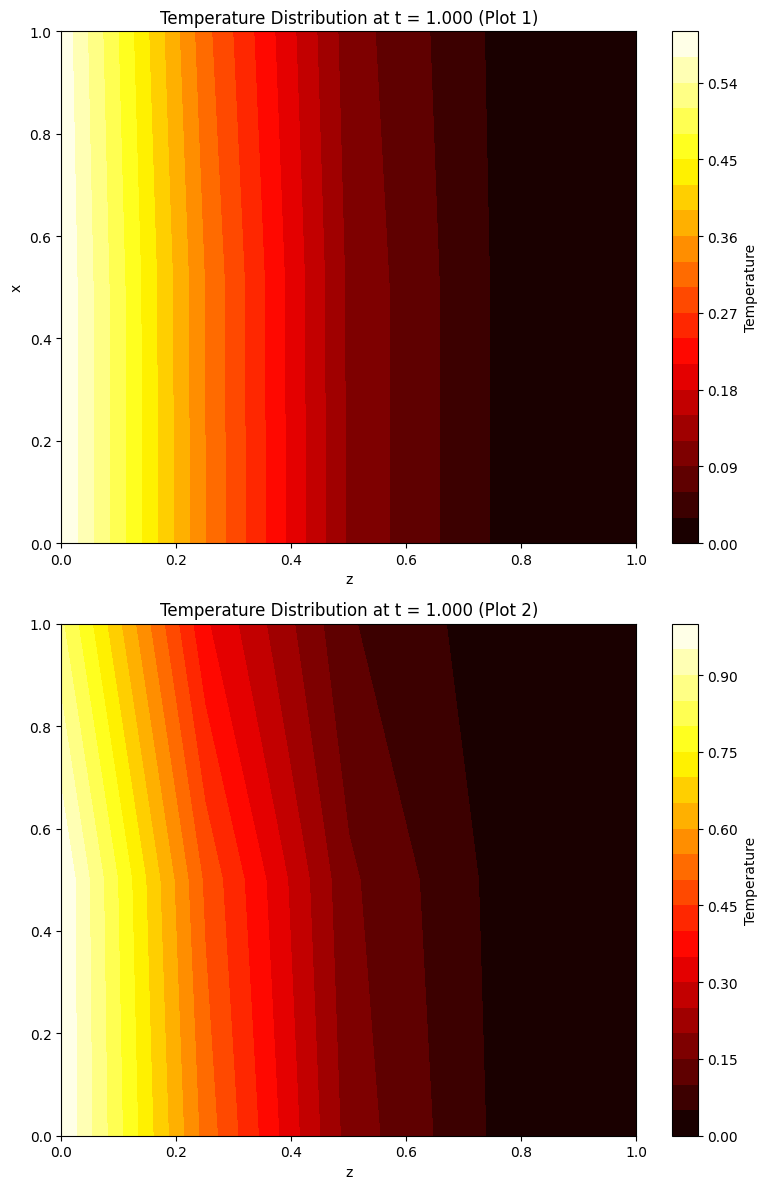

In [ ]:
#TWO COMPONENTS

num_z, num_x = 5, 3
Lz, Lx = 1.0, 1.0  # Dimensions of the 2D domain CAN ADD THE LENGTH AND RADIUS LATER
nz, nx = num_z, num_x+2   # Number of spatial grid points with 2 imaginary nodes
dz, dx = Lz / (nz - 1), Lx / (nx - 1)  # Spatial step sizes
z = np.linspace(0, Lz, nz)
x = np.linspace(0, Lx, nx)

D1 = 10**-2 #diffusion coeff
D2 = 10**-1
v0 = 0.2 #velocity

u_init = np.zeros((2, len(x), len(z)))
u_init[0,:,0] = 0.6
u_init[1,:,0] = 1
u_init = u_init.flatten()

def pde(t,y):
    y = y.reshape((2, nx, nz)) #THE NUMBER OF COMPONENTS HERE IS 2
    dydx2 = np.zeros_like(y) #z ,x
    dydz = np.zeros_like(y)
    dydt = np.zeros_like(y)

    #MAYBE I NEED TO RESET THE BOUNDARY CONDITIONS IN HERE
    y[0,:,0] = 0.6
    y[1,:,0] = 1

    y[:,0,:] = y[:,1,:] #makes it so that there is no flux on bottom boundary (imaginary point in y)
    y[:,-1,:] = 0 #change the flux at this boundary to be the reaction later

    dydz[:,1:-1,1:] = (y[:,1:-1,1:] - y[:,1:-1,:-1])/dz
    dydx2[:,1:-1,:] = (y[:,2:, :] - 2 * y[:,1:-1, :] + y[:,:-2, :]) / dx**2
    
    dydt[0,1:-1,:] = D1*dydx2[0,1:-1,:] - v0*dydz[0,1:-1,:]
    dydt[1,1:-1,:] = D2*dydx2[1,1:-1,:] - v0*dydz[1,1:-1,:]

    return dydt.flatten()

t_final = 1
t_span = (0, t_final)  # Time interval
t_eval = np.linspace(0, t_final, 5)  # Ti   me evaluation points

sol = solve_ivp(pde, t_span, u_init, method='RK45', t_eval=t_eval)

x_plot = np.linspace(0, 1, num_x) 

u_plot = sol.y[:, -1].reshape((2, nx, nz)) #THE NUMBER OF COMPONENTS HERE IS 2

fig, ax = plt.subplots(2, 1, figsize=(8, 12))
ax[0].contourf(z, x_plot, u_plot[0, 1:-1, :], 20, cmap='hot')
ax[0].set_title(f'Temperature Distribution at t = {sol.t[-1]:.3f} (Plot 1)')
ax[0].set_xlabel('z')
ax[0].set_ylabel('x')
fig.colorbar(ax[0].contourf(z, x_plot, u_plot[0, 1:-1, :], 20, cmap='hot'), ax=ax[0], label='Temperature')
ax[1].contourf(z, x_plot, u_plot[1, 1:-1, :], 20, cmap='hot')
ax[1].set_title(f'Temperature Distribution at t = {sol.t[-1]:.3f} (Plot 2)')
ax[1].set_xlabel('z')
fig.colorbar(ax[1].contourf(z, x_plot, u_plot[1, 1:-1, :], 20, cmap='hot'), ax=ax[1], label='Temperature')
plt.tight_layout()
plt.show()